In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

2023-08-31 07:40:29.526691: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
def rmse(y_true, y_pred):
    return np.sqrt(np.nanmean((y_true - y_pred)**2))

# Open dict with collocated ASCAT data

In [3]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/metop/"

In [4]:
with open(data_dir + 'collocated_dict_ascat_gradient_3x3_9000_images_ifs.pickle', 'rb') as handle:
        d = pickle.load(handle)

In [5]:
df = pd.concat(d.values(), ignore_index=True)
df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,-4.214585,3.935597
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,-3.485326,3.685807
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,0.053796,2.618398
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,1.969399,1.141287
4,0.004358,-0.221627,340.649998,2477.589490,1016.508053,1017.731516,4.405489,4.587935,60.655199,58.351445,...,56.239998,101.639999,146.940002,36.759998,27.439999,36.730000,20180404T175400Z,20180404T193258.125000Z,4.476319,0.497334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9164,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,-13.349999,-57.930000,-102.669998,58.980000,47.930000,59.090000,20200121T132400Z,20200121T150558.125000Z,9.854824,-1.954211
9165,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,7.869203,-2.273894
9166,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,7.593998,-2.340672
9167,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,-145.229996,-99.439995,-53.639999,52.279999,41.049999,52.180000,20200121T214800Z,20200121T232958.125000Z,7.223359,-1.862569


In [6]:
df = df.dropna(subset=['UWr', 'rhoair'])
df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,-4.214585,3.935597
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,-3.485326,3.685807
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,0.053796,2.618398
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,1.969399,1.141287
4,0.004358,-0.221627,340.649998,2477.589490,1016.508053,1017.731516,4.405489,4.587935,60.655199,58.351445,...,56.239998,101.639999,146.940002,36.759998,27.439999,36.730000,20180404T175400Z,20180404T193258.125000Z,4.476319,0.497334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9164,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,-13.349999,-57.930000,-102.669998,58.980000,47.930000,59.090000,20200121T132400Z,20200121T150558.125000Z,9.854824,-1.954211
9165,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,7.869203,-2.273894
9166,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,7.593998,-2.340672
9167,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,-145.229996,-99.439995,-53.639999,52.279999,41.049999,52.180000,20200121T214800Z,20200121T232958.125000Z,7.223359,-1.862569


In [7]:
df = df.sample(frac = 1, random_state=77)
df     

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
1503,-0.042230,-0.334789,369.599998,2477.906722,1000.300826,1001.498499,7.974965,7.921645,97.577349,97.796572,...,54.889999,100.500000,145.979996,46.410000,35.730000,46.410000,20170526T140900Z,20170526T155058.125000Z,-2.172911,2.352134
4087,0.038686,0.082603,348.859995,2482.019101,992.072293,993.273495,6.127340,6.146534,89.098558,88.902068,...,-162.050003,-117.579994,-73.059998,58.379997,47.419998,58.520000,20160314T041200Z,20160314T055358.125000Z,16.120512,0.982410
8890,0.078067,-0.018678,322.135001,2486.252920,992.402913,993.617993,4.841986,4.883098,85.735253,85.364232,...,-11.090000,-55.649998,-100.449997,63.250000,52.360001,63.570000,20191109T141500Z,20191109T155658.125000Z,-5.969720,-6.151449
6597,-0.012150,-0.032903,310.074997,2488.131506,977.608494,978.824002,3.753534,3.801537,87.686853,87.442990,...,-17.129999,-61.789997,-106.739998,46.980000,36.489998,47.259998,20201111T135100Z,20201111T152958.125000Z,-2.866442,14.121944
1565,0.111582,-0.016399,376.785001,2470.839518,1007.676844,1008.868503,9.054920,9.040190,89.332898,88.474956,...,116.540001,71.669998,26.650000,37.730000,28.279999,37.700001,20180930T031800Z,20180930T045958.125000Z,1.973004,0.335455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4832,0.108413,0.517571,330.450005,2486.419860,1007.737764,1008.967007,5.635789,5.639626,95.155485,95.193701,...,70.150002,114.680000,159.139999,48.669998,37.969997,48.500000,20161025T132400Z,20161025T150258.125000Z,13.576246,5.677454
9119,0.078067,-0.018678,269.295003,2491.675542,980.709209,981.951001,2.038906,2.166475,70.647104,69.665131,...,-18.180000,-62.869999,-107.879997,42.959999,32.880001,43.209999,20200112T134500Z,20200112T152358.125000Z,13.502748,5.582858
7832,-0.012150,-0.032903,343.024994,2487.964085,993.379376,994.591995,5.564891,5.561886,92.930303,92.888906,...,-15.780000,-60.399998,-105.009995,52.590000,41.669998,52.619999,20210609T135100Z,20210609T153258.125000Z,0.451083,7.852533
2283,0.066199,-0.093856,347.385001,2477.379817,1020.312158,1021.544498,6.128193,6.172027,86.986450,86.726191,...,57.360001,102.909996,148.360001,39.709999,29.869999,39.680000,20160730T123600Z,20160730T141458.125000Z,6.541875,1.584597


In [8]:
c = df['stress']
y = - df['UWr'] * df['rhoair']

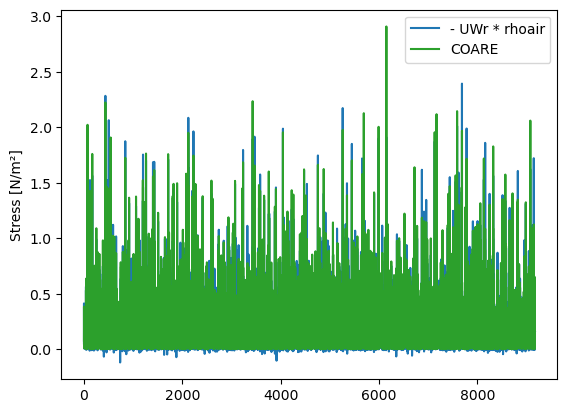

In [9]:
plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

Text(0, 0.5, 'COARE [N/m²]')

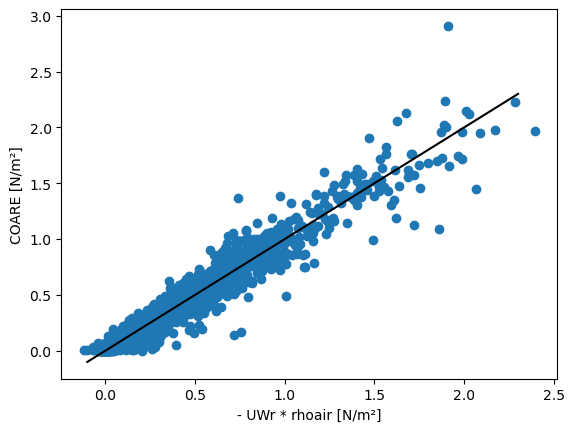

In [10]:
plt.scatter(y.values, c.values)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 

In [11]:
df = df[( (df['UWr'] >= -2) & (df['UWr'] <= 2) )]               

In [12]:
df.shape

(9169, 70)

In [13]:
df.shape[0]*0.8

7335.200000000001

In [14]:
split_idx = int(df.shape[0]*0.8)
split_idx

7335

# Prepare features and labels

In [15]:
predictor_variables = [
    'sigma0_trip_fore_x', 'sigma0_trip_mid_x', 'sigma0_trip_aft_x',
    'sigma0_trip_fore_y', 'sigma0_trip_mid_y', 'sigma0_trip_aft_y',
    'azi_angle_trip_fore', 'azi_angle_trip_mid', 'azi_angle_trip_aft',
    'inc_angle_trip_fore', 'inc_angle_trip_mid', 'inc_angle_trip_aft',
    'u10', 'v10'
]

In [16]:
x = df[predictor_variables]
x

,sigma0_trip_fore_x,sigma0_trip_mid_x,sigma0_trip_aft_x,sigma0_trip_fore_y,sigma0_trip_mid_y,sigma0_trip_aft_y,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,u10,v10
1503,2.323833,1.361176,0.800655,1.589887,-0.582432,-1.634018,54.889999,100.500000,145.979996,46.410000,35.730000,46.410000,-2.172911,2.352134
4087,0.122717,-0.089444,0.076525,0.624117,0.104422,-0.010221,-162.050003,-117.579994,-73.059998,58.379997,47.419998,58.520000,16.120512,0.982410
8890,-0.519825,-0.031778,0.848553,1.764124,1.208916,0.084520,-11.090000,-55.649998,-100.449997,63.250000,52.360001,63.570000,-5.969720,-6.151449
6597,-2.251680,-2.363024,-1.850727,-0.786232,-1.970510,-2.564363,-17.129999,-61.789997,-106.739998,46.980000,36.489998,47.259998,-2.866442,14.121944
1565,5.722150,2.461925,5.916743,1.319185,-0.684412,1.825567,116.540001,71.669998,26.650000,37.730000,28.279999,37.700001,1.973004,0.335455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4832,0.583340,0.754526,0.023554,1.853245,2.886234,3.178135,70.150002,114.680000,159.139999,48.669998,37.969997,48.500000,13.576246,5.677454
9119,-2.135969,-1.229816,-0.594519,-0.535446,1.053942,3.216396,-18.180000,-62.869999,-107.879997,42.959999,32.880001,43.209999,13.502748,5.582858
7832,-1.416528,-2.050679,-1.565599,-0.186468,-0.459070,-1.277481,-15.780000,-60.399998,-105.009995,52.590000,41.669998,52.619999,0.451083,7.852533
2283,1.058346,1.844107,0.944395,1.793869,1.058164,1.996574,57.360001,102.909996,148.360001,39.709999,29.869999,39.680000,6.541875,1.584597


In [17]:
y = - df['UWr'] * df['rhoair']
y

1503    0.052995
4087    0.413496
8890    0.180907
6597    0.102608
1565    0.058667
          ...   
4832    0.011865
9119    0.056253
7832    0.159484
2283    0.081974
8799    0.159046
Length: 9169, dtype: float64

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

# COARE

In [18]:
c = df['stress']

In [19]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [20]:
y_train = y[:split_idx]
y_test = y[split_idx:]

In [21]:
c_train = c[:split_idx]
c_test = c[split_idx:]

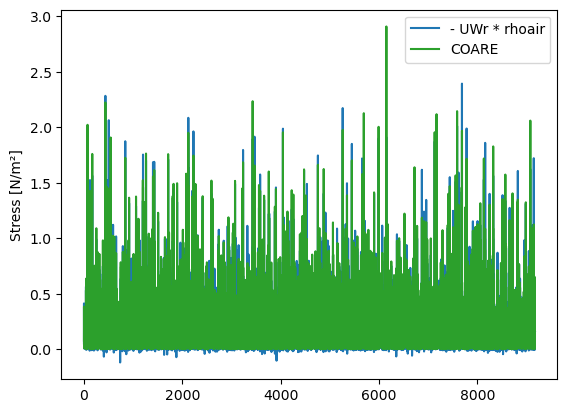

In [22]:

plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

In [23]:
# Compute average and std of the training data
x_train_mean = np.nanmean(x_train, axis=0)
x_train_std = np.nanstd(x_train, axis=0)

y_train_mean = np.nanmean(y_train, axis=0)
y_train_std = np.nanstd(y_train,axis=0)

# Normalize
x_train_norm = (x_train - x_train_mean) / x_train_std
x_test_norm = (x_test - x_train_mean) / x_train_std
y_train_norm = (y_train - y_train_mean) / y_train_std
y_test_norm = (y_test - y_train_mean) / y_train_std

# ML setup

In [24]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [25]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

Variables do not exist


# First experiment - Linear regression

In [26]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500


2023-08-31 07:40:32.771897: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-08-31 07:40:32.772916: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-08-31 07:40:32.772926: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-08-31 07:40:32.772951: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c6525-hw8rl83-bn-compute): /proc/driver/nvidia/version does not exist
2023-08-31 07:40:32.773555: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, 

161/161 [==============================] - 1s 3ms/step - loss: 3.4446 - mean_absolute_error: 1.3852 - val_loss: 3.1328 - val_mean_absolute_error: 1.1807
Epoch 2/500
161/161 [==============================] - 0s 674us/step - loss: 2.3547 - mean_absolute_error: 1.0669 - val_loss: 2.2179 - val_mean_absolute_error: 0.9432
Epoch 3/500
161/161 [==============================] - 0s 647us/step - loss: 1.8476 - mean_absolute_error: 0.8908 - val_loss: 1.7294 - val_mean_absolute_error: 0.8021
Epoch 4/500
161/161 [==============================] - 0s 644us/step - loss: 1.7329 - mean_absolute_error: 0.7893 - val_loss: 1.4747 - val_mean_absolute_error: 0.7286
Epoch 5/500
161/161 [==============================] - 0s 645us/step - loss: 1.3634 - mean_absolute_error: 0.7261 - val_loss: 1.3345 - val_mean_absolute_error: 0.6887
Epoch 6/500
161/161 [==============================] - 0s 674us/step - loss: 1.3629 - mean_absolute_error: 0.7073 - val_loss: 1.2541 - val_mean_absolute_error: 0.6680
Epoch 7/500


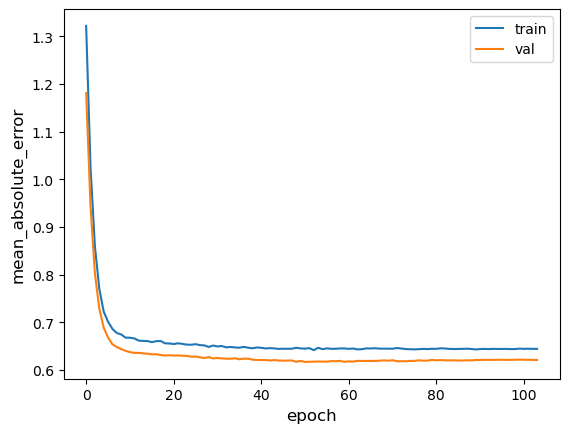

58/58 [==============================] - 0s 339us/step - loss: 1.0719 - mean_absolute_error: 0.6506
Test accuracy 0.6505690217018127
Test loss 1.0719178915023804


In [27]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [28]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [29]:
np.mean(y_test)

0.17252562895027762

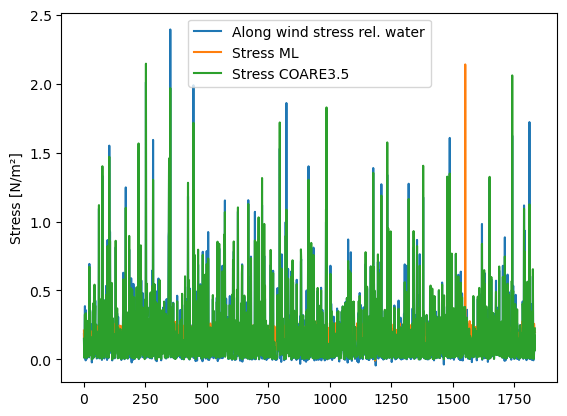

In [30]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

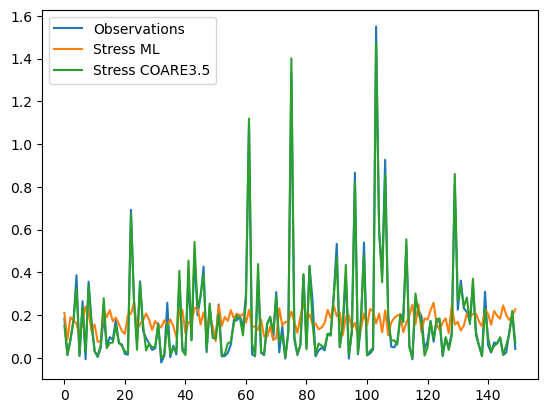

In [31]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

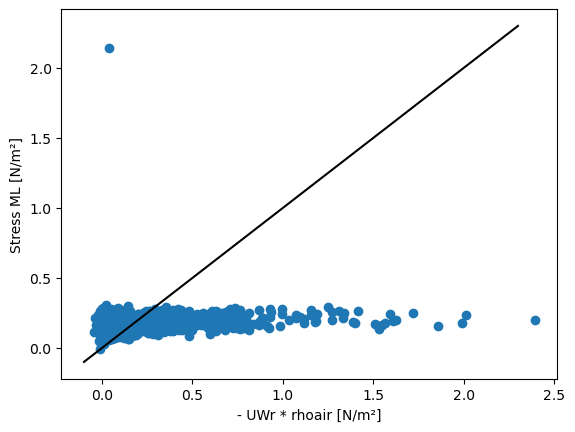

In [32]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

Text(0, 0.5, 'COARE [N/m²]')

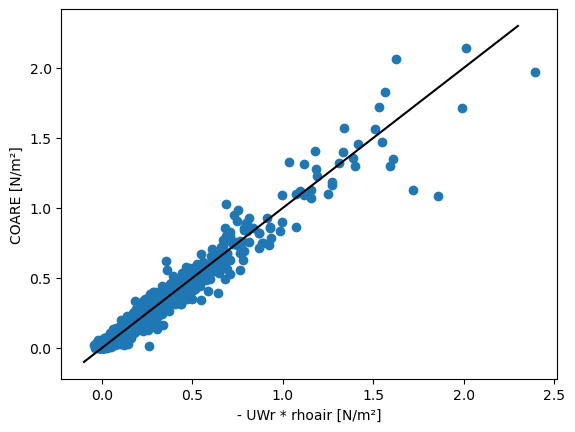

In [33]:
plt.scatter(y_test.values, c_test.values)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 

In [34]:
rmse(y_test.values, y_test_pred)

0.25355749252367227

In [35]:
rmse(y_test.values, c_test)

0.05139458523843941

## Correlation

In [36]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.14493097],
       [0.14493097, 1.        ]])

In [37]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774866],
       [0.97774866, 1.        ]])

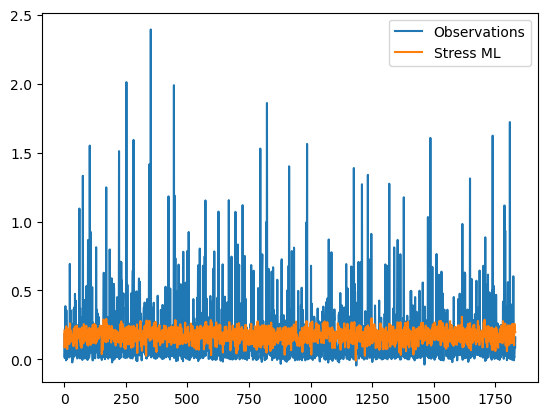

In [38]:
plt.plot(y_test.values[y_test_pred[:, 0] < 1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 1], label='Stress ML')
plt.legend()

In [39]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1, 0])

array([[1.        , 0.21570584],
       [0.21570584, 1.        ]])

In [40]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], c_test.values[y_test_pred[:, 0] < 1])

array([[1.        , 0.97774512],
       [0.97774512, 1.        ]])

In [41]:
rmse(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1])

0.2494100803378592

## Correlation

In [42]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.14493097],
       [0.14493097, 1.        ]])

In [43]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774866],
       [0.97774866, 1.        ]])

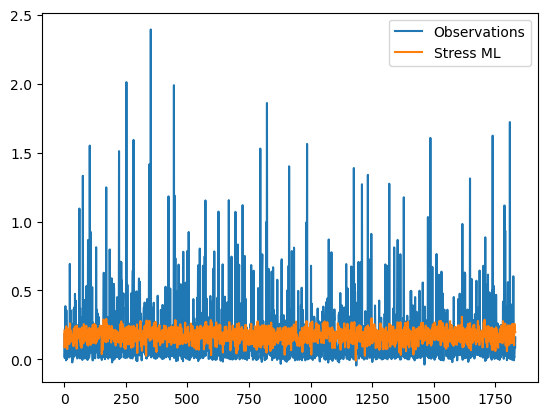

In [44]:
plt.plot(y_test.values[y_test_pred[:, 0] < 1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 1], label='Stress ML')
plt.legend()

In [45]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1, 0])

array([[1.        , 0.21570584],
       [0.21570584, 1.        ]])

In [46]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], c_test.values[y_test_pred[:, 0] < 1])

array([[1.        , 0.97774512],
       [0.97774512, 1.        ]])

In [47]:
rmse(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1])

0.2494100803378592

# Other experiments

In [48]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [49]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [50]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(126, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
161/161 [==============================] - 1s 2ms/step - loss: 1.8485 - mean_absolute_error: 1.0007 - val_loss: 1.0428 - val_mean_absolute_error: 0.6605
Epoch 2/500
161/161 [==============================] - 0s 1ms/step - loss: 1.3441 - mean_absolute_error: 0.8314 - val_loss: 1.1782 - val_mean_absolute_error: 0.6446
Epoch 3/500
161/161 [==============================] - 0s 1ms/step - loss: 1.1231 - mean_absolute_error: 0.7535 - val_loss: 1.0705 - val_mean_absolute_error: 0.6487
Epoch 4/500
161/161 [==============================] - 0s 1ms/step - loss: 1.0785 - mean_absolute_error: 0.7235 - val_loss: 1.0239 - val_mean_absolute_error: 0.6112
Epoch 5/500
161/161 [==============================] - 0s 1ms/step - loss: 1.0530 - mean_absolute_error: 0.6977 - val_loss: 1.0793 - val_mean_absolute_error: 0.6281
Epoch 6/500
161/161 [==============================] - 0s 1ms/step - loss: 1.0835 - mean_absolute_error: 0.6802 - val_loss: 1.0537 - val_mean_absolute_error: 0.6199
Epoch 7/50

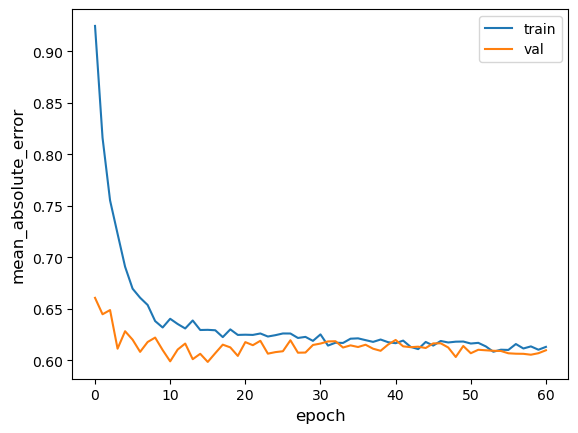

58/58 [==============================] - 0s 409us/step - loss: 1.1310 - mean_absolute_error: 0.6393
Test accuracy 0.6392978429794312
Test loss 1.1309634447097778


In [51]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [52]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [53]:
rmse(y_test.values, y_test_pred)

0.26919051947167766

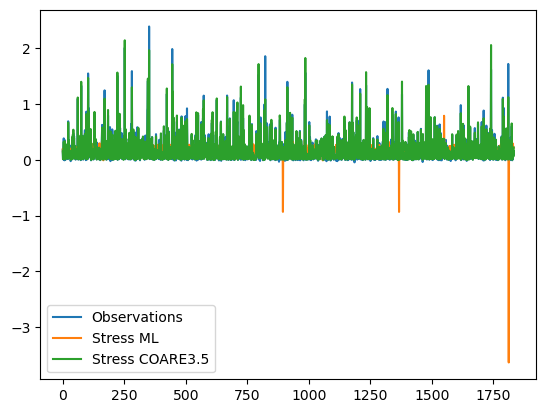

In [54]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

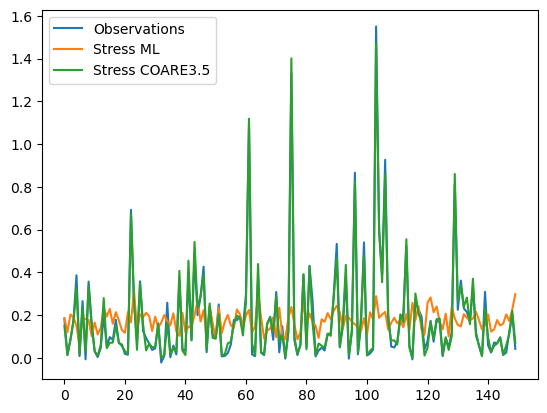

In [55]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

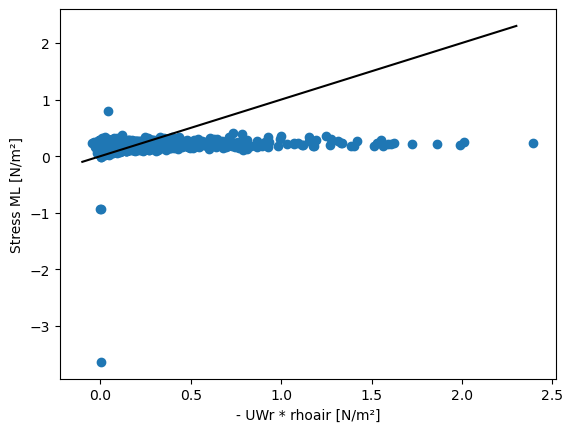

In [56]:
plt.scatter(y_test, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [57]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.17433784],
       [0.17433784, 1.        ]])

In [58]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774866],
       [0.97774866, 1.        ]])

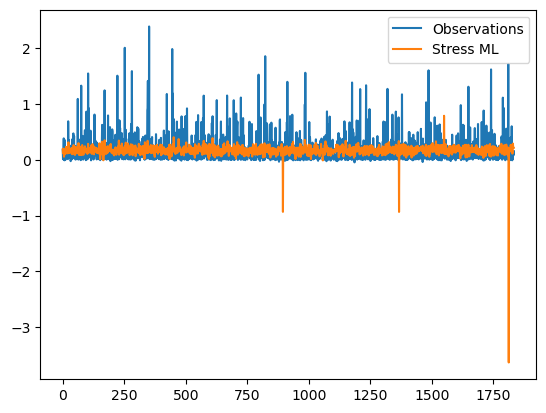

In [59]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.legend()

In [60]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 2.5], c_test.values[y_test_pred[:, 0] < 2.5])

array([[1.        , 0.97774866],
       [0.97774866, 1.        ]])

In [61]:
rmse(y_test.values[y_test_pred[:, 0] < 2.5], y_test_pred[y_test_pred[:, 0] < 2.5])

0.26919051947167766

Text(0, 0.5, 'Stress ML [N/m²]')

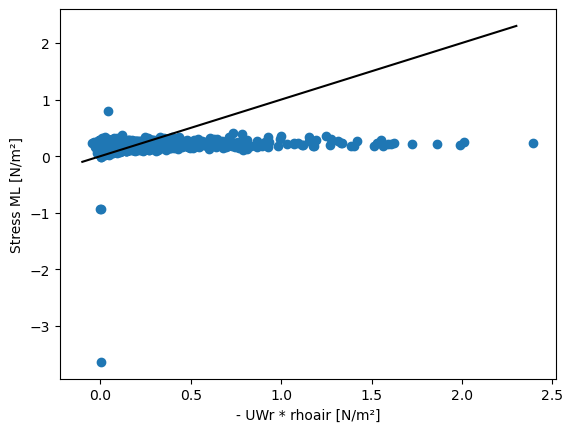

In [62]:
plt.scatter(y_test.values[y_test_pred[:, 0] < 2.5], y_test_pred[y_test_pred[:, 0] < 2.5])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [63]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.17433784],
       [0.17433784, 1.        ]])

In [64]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774866],
       [0.97774866, 1.        ]])

In [65]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [66]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [67]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
161/161 [==============================] - 1s 5ms/step - loss: 3.3475 - mean_absolute_error: 1.3435 - val_loss: 1.2479 - val_mean_absolute_error: 0.8725
Epoch 2/500
161/161 [==============================] - 1s 4ms/step - loss: 1.4248 - mean_absolute_error: 0.8481 - val_loss: 1.2998 - val_mean_absolute_error: 0.7338
Epoch 3/500
161/161 [==============================] - 1s 4ms/step - loss: 1.2806 - mean_absolute_error: 0.7897 - val_loss: 0.9512 - val_mean_absolute_error: 0.6476
Epoch 4/500
161/161 [==============================] - 1s 4ms/step - loss: 1.0163 - mean_absolute_error: 0.6956 - val_loss: 1.0181 - val_mean_absolute_error: 0.6282
Epoch 5/500
161/161 [==============================] - 1s 4ms/step - loss: 1.0554 - mean_absolute_error: 0.6842 - val_loss: 1.0328 - val_mean_absolute_error: 0.6281
Epoch 6/500
161/161 [==============================] - 1s 4ms/step - loss: 0.9884 - mean_absolute_error: 0.6513 - val_loss: 1.0390 - val_mean_absolute_error: 0.6460
Epoch 7/50

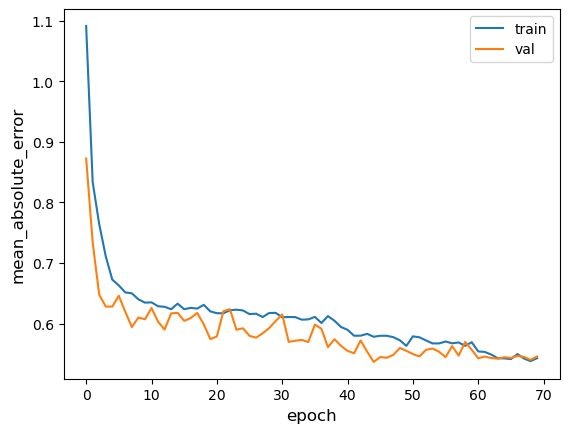

58/58 [==============================] - 0s 688us/step - loss: 1.9275 - mean_absolute_error: 0.5835
Test accuracy 0.5834850668907166
Test loss 1.9275012016296387


In [68]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [69]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [70]:
rmse(y_test.values, y_test_pred)

0.34351150891627164

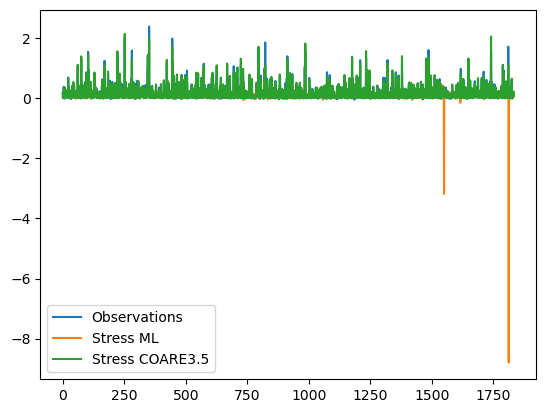

In [71]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

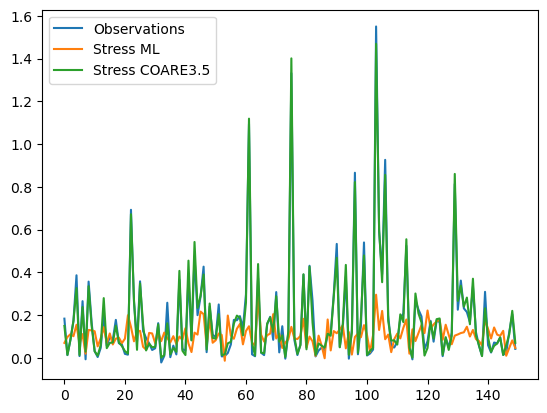

In [72]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [73]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.09610968],
       [0.09610968, 1.        ]])

In [74]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774866],
       [0.97774866, 1.        ]])

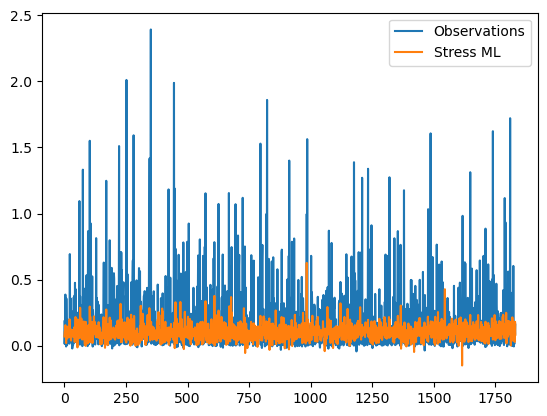

In [75]:
plt.plot(y_test.values[y_test_pred[:, 0] > -1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -1], label='Stress ML')
plt.legend()

In [76]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -1], c_test.values[y_test_pred[:, 0] > -1])

array([[1.        , 0.97773928],
       [0.97773928, 1.        ]])

In [77]:
rmse(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])

0.26093887250796904

Text(0, 0.5, 'Stress ML [N/m²]')

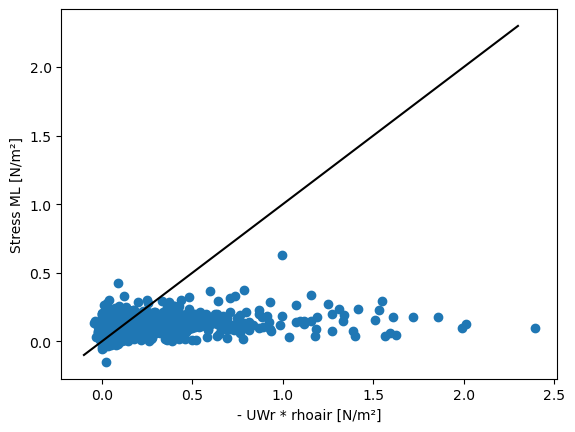

In [78]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [79]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [80]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [81]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
161/161 [==============================] - 3s 12ms/step - loss: 3.4159 - mean_absolute_error: 1.3184 - val_loss: 1.0217 - val_mean_absolute_error: 0.7372
Epoch 2/500
161/161 [==============================] - 2s 11ms/step - loss: 1.3990 - mean_absolute_error: 0.8536 - val_loss: 0.9318 - val_mean_absolute_error: 0.5941
Epoch 3/500
161/161 [==============================] - 2s 11ms/step - loss: 1.2904 - mean_absolute_error: 0.7804 - val_loss: 0.9310 - val_mean_absolute_error: 0.6530
Epoch 4/500
161/161 [==============================] - 2s 11ms/step - loss: 1.1180 - mean_absolute_error: 0.7187 - val_loss: 0.9505 - val_mean_absolute_error: 0.6266
Epoch 5/500
161/161 [==============================] - 2s 11ms/step - loss: 1.0686 - mean_absolute_error: 0.6990 - val_loss: 0.8632 - val_mean_absolute_error: 0.5952
Epoch 6/500
161/161 [==============================] - 2s 11ms/step - loss: 1.0060 - mean_absolute_error: 0.6729 - val_loss: 0.9075 - val_mean_absolute_error: 0.6148
Epoc

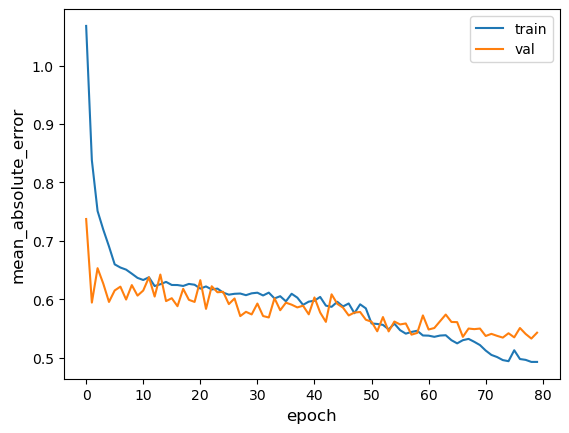

58/58 [==============================] - 0s 2ms/step - loss: 1.2535 - mean_absolute_error: 0.5757
Test accuracy 0.575732409954071
Test loss 1.253549575805664


In [82]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [83]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [84]:
rmse(y_test.values, y_test_pred)

0.2858351389194895

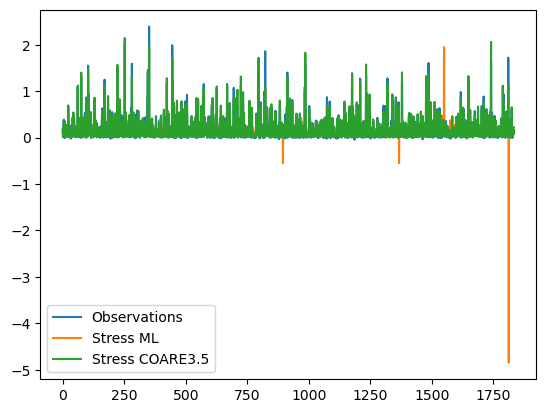

In [85]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

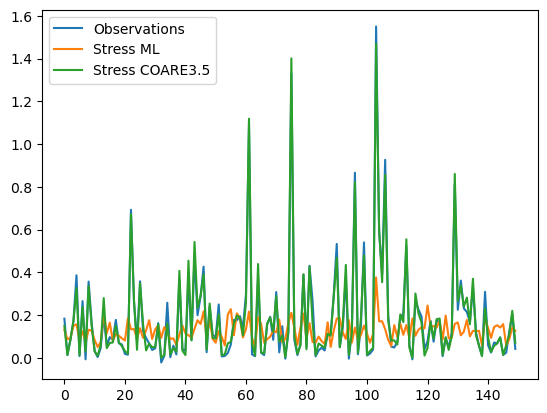

In [86]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [87]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.17436591],
       [0.17436591, 1.        ]])

In [88]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774866],
       [0.97774866, 1.        ]])

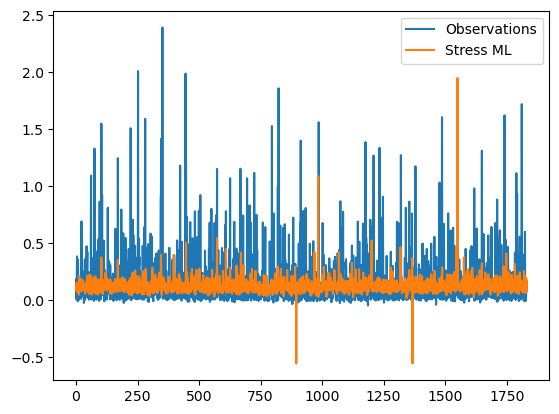

In [89]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [90]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97774282],
       [0.97774282, 1.        ]])

In [91]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.26080591696463584

Text(0, 0.5, 'Stress ML [N/m²]')

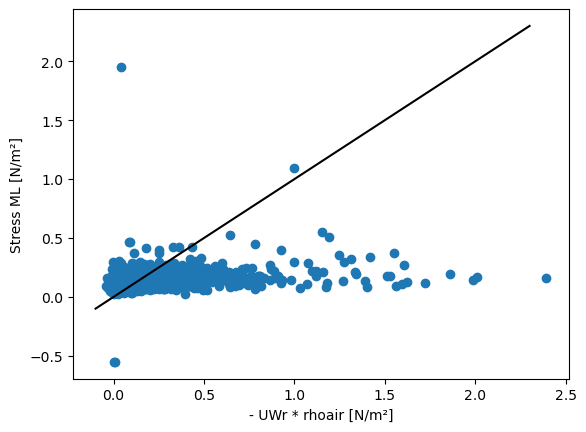

In [92]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

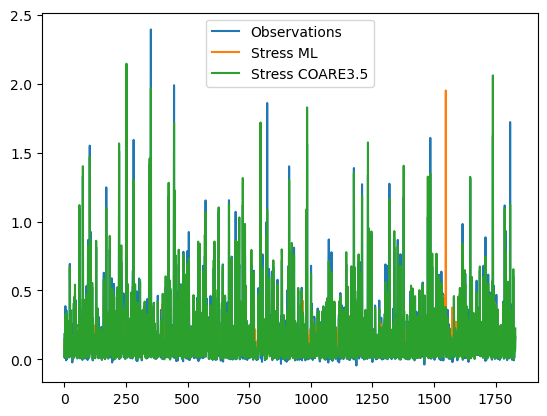

In [93]:
plt.plot(y_test.values[y_test_pred[:, 0] > -0.5], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -0.5], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -0.5], label='Stress COARE3.5')
plt.legend()

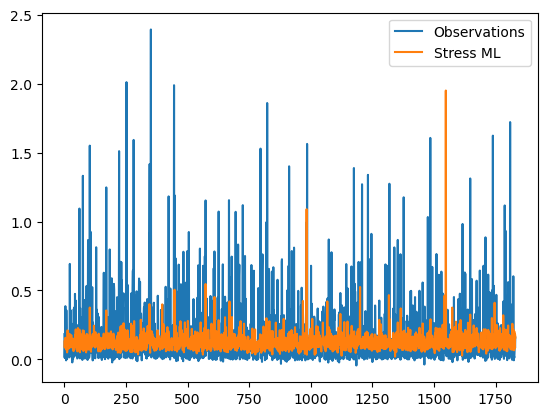

In [94]:
plt.plot(y_test.values[y_test_pred[:, 0] > -0.5], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -0.5], label='Stress ML')
plt.legend()

In [95]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -0.5], y_test_pred[y_test_pred[:, 0] > -0.5, 0])

array([[1.        , 0.29410512],
       [0.29410512, 1.        ]])

In [96]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -0.5], c_test.values[y_test_pred[:, 0] > -0.5])

array([[1.        , 0.97773103],
       [0.97773103, 1.        ]])

In [97]:
rmse(y_test.values[y_test_pred[:, 0] > -0.5], y_test_pred[y_test_pred[:, 0] > -0.5])

0.25981519942286746

Text(0, 0.5, 'Stress ML [N/m²]')

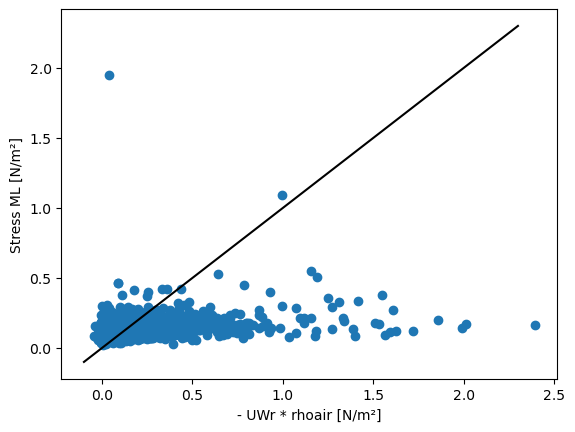

In [98]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -0.5], y_test_pred[y_test_pred[:, 0] > -0.5])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [99]:
OUT_STEPS = 1
num_features = 1
batch_size =512
epochs=500

metric = 'mean_absolute_error'

In [100]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [101]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
11/11 [==============================] - 1s 39ms/step - loss: 12.8745 - mean_absolute_error: 2.4300 - val_loss: 0.9514 - val_mean_absolute_error: 0.6576
Epoch 2/500
11/11 [==============================] - 0s 38ms/step - loss: 2.5175 - mean_absolute_error: 1.1782 - val_loss: 0.9857 - val_mean_absolute_error: 0.6564
Epoch 3/500
11/11 [==============================] - 0s 35ms/step - loss: 1.9420 - mean_absolute_error: 1.0152 - val_loss: 1.0365 - val_mean_absolute_error: 0.6677
Epoch 4/500
11/11 [==============================] - 0s 31ms/step - loss: 1.7345 - mean_absolute_error: 0.9193 - val_loss: 1.0331 - val_mean_absolute_error: 0.7339
Epoch 5/500
11/11 [==============================] - 0s 29ms/step - loss: 1.4732 - mean_absolute_error: 0.8696 - val_loss: 1.0057 - val_mean_absolute_error: 0.6993
Epoch 6/500
11/11 [==============================] - 0s 28ms/step - loss: 1.4352 - mean_absolute_error: 0.8590 - val_loss: 1.0576 - val_mean_absolute_error: 0.7536
Epoch 7/500
11/

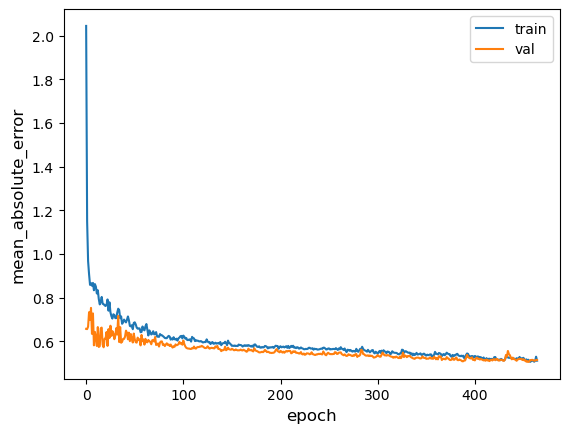

58/58 [==============================] - 0s 2ms/step - loss: 0.9833 - mean_absolute_error: 0.5540
Test accuracy 0.5540162324905396
Test loss 0.9832750558853149


In [102]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [103]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [104]:
rmse(y_test.values, y_test_pred)

0.27542848356054234

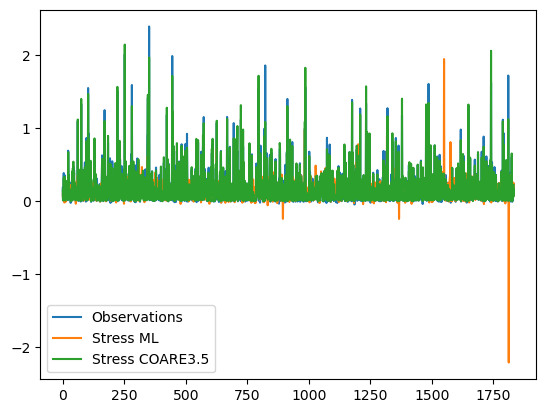

In [105]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

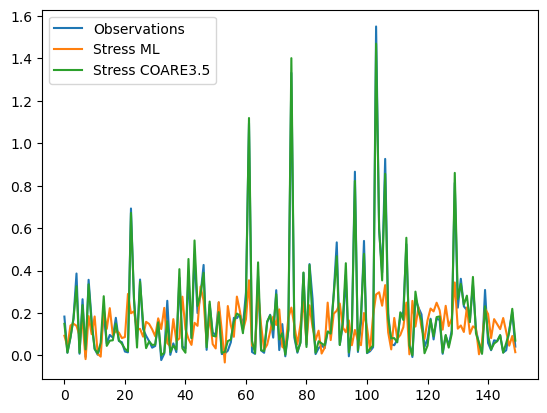

In [106]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [107]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.35410719],
       [0.35410719, 1.        ]])

In [108]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774866],
       [0.97774866, 1.        ]])

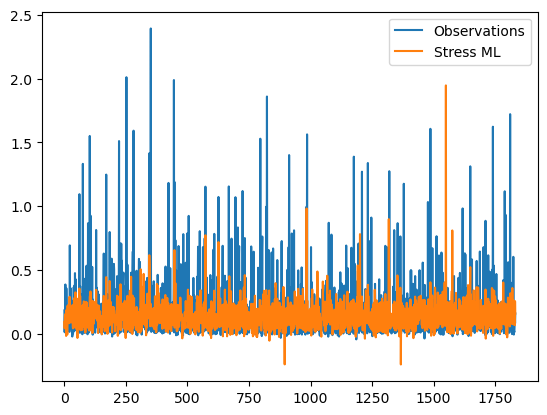

In [109]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [110]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97774282],
       [0.97774282, 1.        ]])

In [111]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.2698212846823422

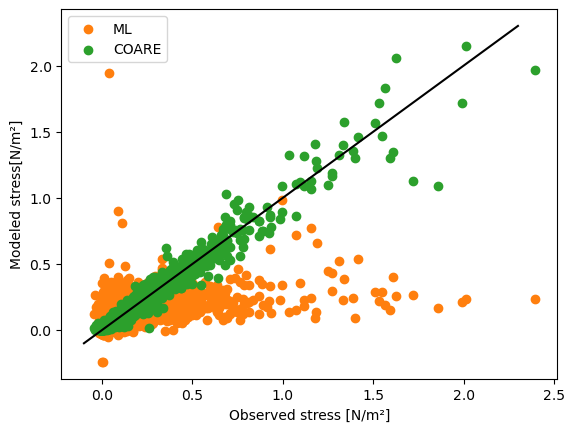

In [112]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2], label='ML', color='C1')
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2], label='COARE', color='C2')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

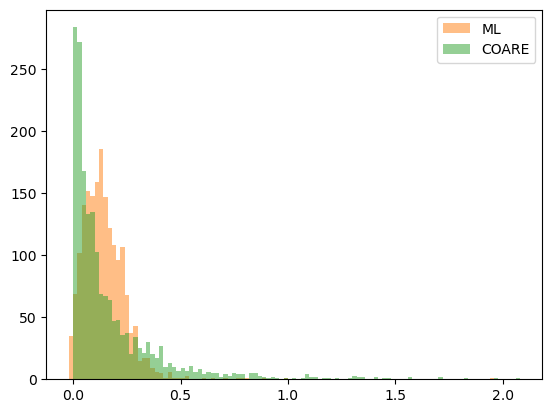

In [113]:
plt.hist(y_test_pred[y_test_pred[:, 0] > -2], label='ML', color='C1', alpha=0.5, bins=np.arange(-0.02, 2.1, 0.02)  )
plt.hist(c_test.values[y_test_pred[:, 0] > -2], label='COARE', color='C2', alpha=0.5, bins=np.arange(-0.02, 2.1, 0.02) )
plt.legend()

# Best model

In [114]:
OUT_STEPS = 1
num_features = 1
batch_size =512
epochs=500

metric = 'mean_absolute_error'

In [115]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [116]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
11/11 [==============================] - 1s 38ms/step - loss: 9.9436 - mean_absolute_error: 2.1404 - val_loss: 1.0171 - val_mean_absolute_error: 0.6295
Epoch 2/500
11/11 [==============================] - 0s 27ms/step - loss: 2.4315 - mean_absolute_error: 1.0552 - val_loss: 0.9388 - val_mean_absolute_error: 0.6536
Epoch 3/500
11/11 [==============================] - 0s 28ms/step - loss: 1.6579 - mean_absolute_error: 0.9078 - val_loss: 1.0612 - val_mean_absolute_error: 0.6351
Epoch 4/500
11/11 [==============================] - 0s 28ms/step - loss: 1.7163 - mean_absolute_error: 0.8794 - val_loss: 1.0428 - val_mean_absolute_error: 0.7387
Epoch 5/500
11/11 [==============================] - 0s 28ms/step - loss: 1.6243 - mean_absolute_error: 0.8968 - val_loss: 0.9223 - val_mean_absolute_error: 0.6224
Epoch 6/500
11/11 [==============================] - 0s 28ms/step - loss: 1.3432 - mean_absolute_error: 0.8203 - val_loss: 1.0109 - val_mean_absolute_error: 0.7066
Epoch 7/500
11/1

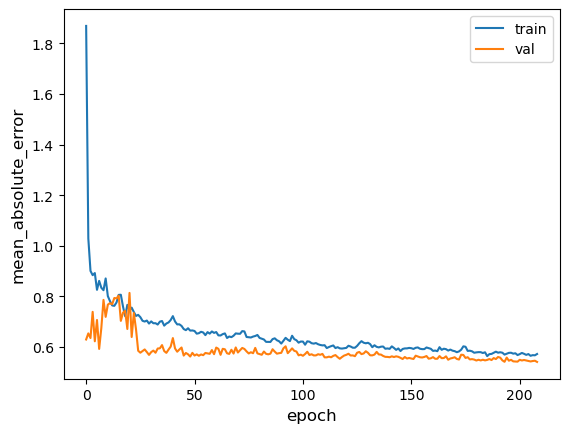

58/58 [==============================] - 0s 2ms/step - loss: 0.9514 - mean_absolute_error: 0.5706
Test accuracy 0.570630669593811
Test loss 0.9513992667198181


In [117]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [118]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [119]:
rmse(y_test.values, y_test_pred)

0.2667898354612537

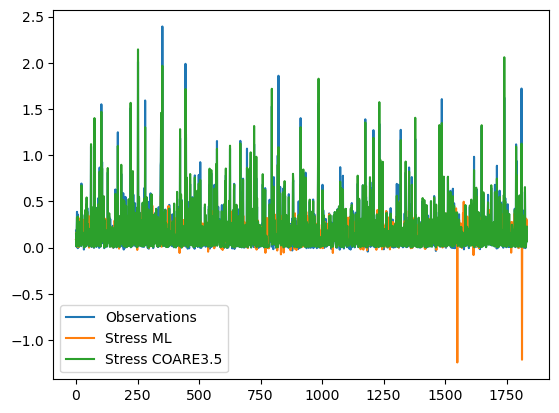

In [120]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

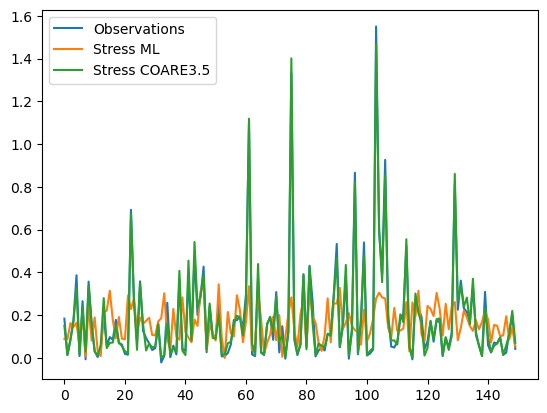

In [121]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [122]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.35568943],
       [0.35568943, 1.        ]])

In [123]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774866],
       [0.97774866, 1.        ]])

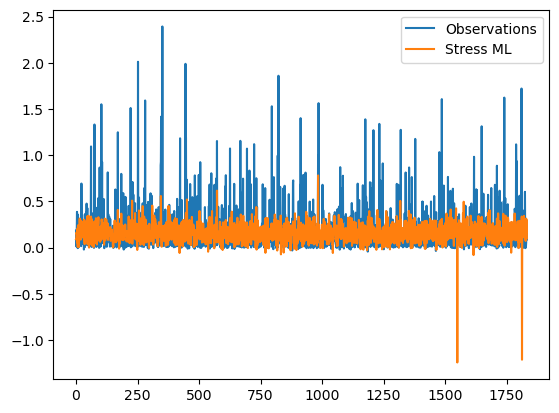

In [124]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [125]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97774866],
       [0.97774866, 1.        ]])

In [126]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.2667898354612537

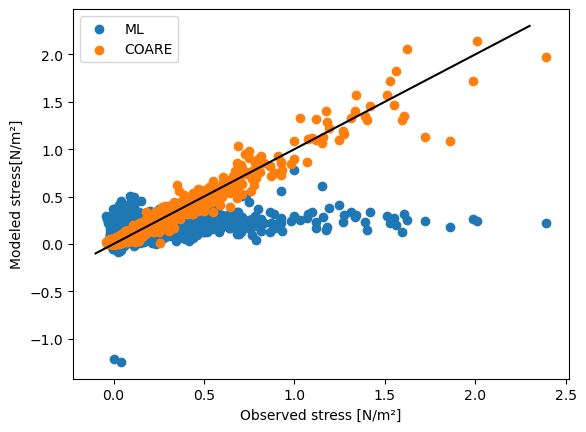

In [127]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2], label='ML')
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2], label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

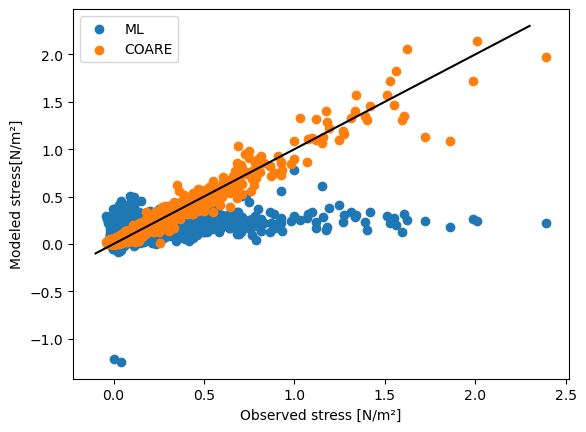

In [128]:
plt.scatter(y_test.values, y_test_pred, label='ML')
plt.scatter(y_test.values, c_test.values, label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

In [129]:
OUT_STEPS = 1
num_features = 1
batch_size =1024
epochs=500

metric = 'mean_absolute_error'

In [130]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [131]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
6/6 [==============================] - 2s 147ms/step - loss: 14.0453 - mean_absolute_error: 2.5344 - val_loss: 0.9834 - val_mean_absolute_error: 0.6704
Epoch 2/500
6/6 [==============================] - 1s 102ms/step - loss: 3.4242 - mean_absolute_error: 1.3910 - val_loss: 1.1323 - val_mean_absolute_error: 0.6530
Epoch 3/500
6/6 [==============================] - 1s 101ms/step - loss: 2.5869 - mean_absolute_error: 1.1689 - val_loss: 1.1979 - val_mean_absolute_error: 0.6327
Epoch 4/500
6/6 [==============================] - 1s 101ms/step - loss: 2.2977 - mean_absolute_error: 1.1191 - val_loss: 1.0192 - val_mean_absolute_error: 0.6624
Epoch 5/500
6/6 [==============================] - 1s 101ms/step - loss: 2.0699 - mean_absolute_error: 1.0235 - val_loss: 0.9502 - val_mean_absolute_error: 0.6706
Epoch 6/500
6/6 [==============================] - 1s 101ms/step - loss: 2.0727 - mean_absolute_error: 1.0158 - val_loss: 1.1092 - val_mean_absolute_error: 0.7474
Epoch 7/500
6/6 [====

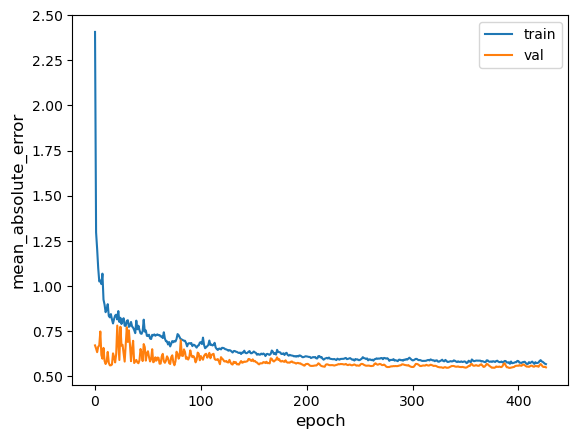

58/58 [==============================] - 0s 7ms/step - loss: 0.9174 - mean_absolute_error: 0.5790
Test accuracy 0.5789903998374939
Test loss 0.9173758625984192


In [132]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [133]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [134]:
rmse(y_test.values, y_test_pred)

0.2631543473119316

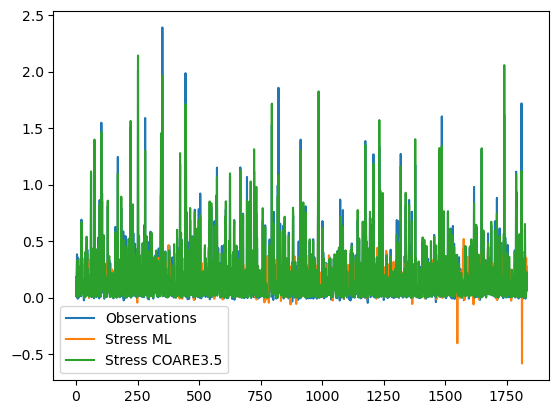

In [135]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

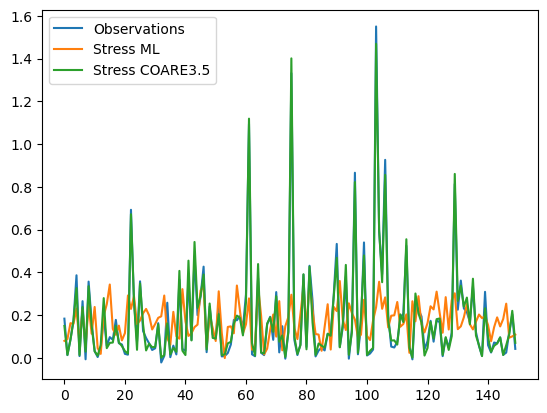

In [136]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [137]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.38719751],
       [0.38719751, 1.        ]])

In [138]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774866],
       [0.97774866, 1.        ]])

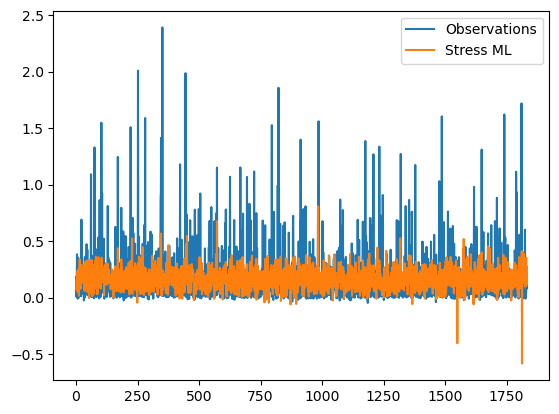

In [139]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [140]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97774866],
       [0.97774866, 1.        ]])

In [141]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.2631543473119316

Text(0, 0.5, 'Stress ML [N/m²]')

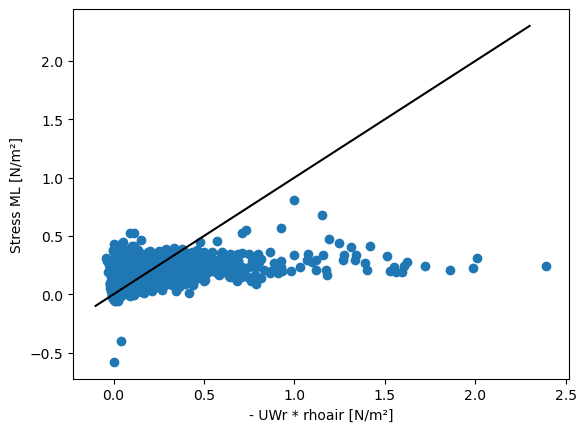

In [142]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

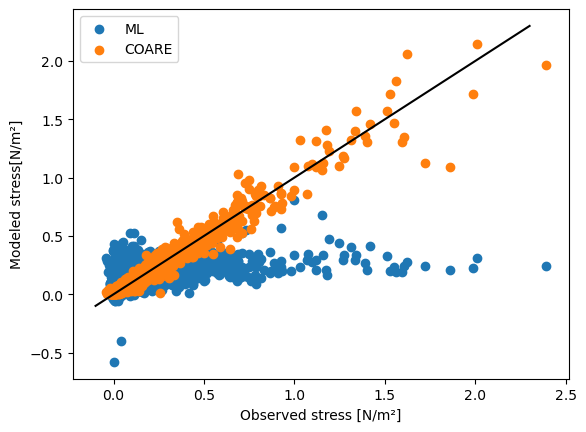

In [143]:
plt.scatter(y_test.values, y_test_pred, label='ML')
plt.scatter(y_test.values, c_test.values, label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

In [144]:
OUT_STEPS = 1
num_features = 1
batch_size =2048
epochs=1000

metric = 'mean_absolute_error'

In [145]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [146]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/1000
3/3 [==============================] - 3s 563ms/step - loss: 17.3868 - mean_absolute_error: 2.8983 - val_loss: 1.1424 - val_mean_absolute_error: 0.6554
Epoch 2/1000
3/3 [==============================] - 1s 486ms/step - loss: 4.1479 - mean_absolute_error: 1.5292 - val_loss: 1.2348 - val_mean_absolute_error: 0.6883
Epoch 3/1000
3/3 [==============================] - 1s 486ms/step - loss: 3.2625 - mean_absolute_error: 1.3515 - val_loss: 1.9623 - val_mean_absolute_error: 0.6215
Epoch 4/1000
3/3 [==============================] - 2s 492ms/step - loss: 3.3208 - mean_absolute_error: 1.1998 - val_loss: 1.7433 - val_mean_absolute_error: 0.7542
Epoch 5/1000
3/3 [==============================] - 1s 484ms/step - loss: 1.9091 - mean_absolute_error: 0.9999 - val_loss: 1.8199 - val_mean_absolute_error: 0.8757
Epoch 6/1000
3/3 [==============================] - 1s 492ms/step - loss: 1.8955 - mean_absolute_error: 0.9943 - val_loss: 1.6323 - val_mean_absolute_error: 0.6482
Epoch 7/1000
3/

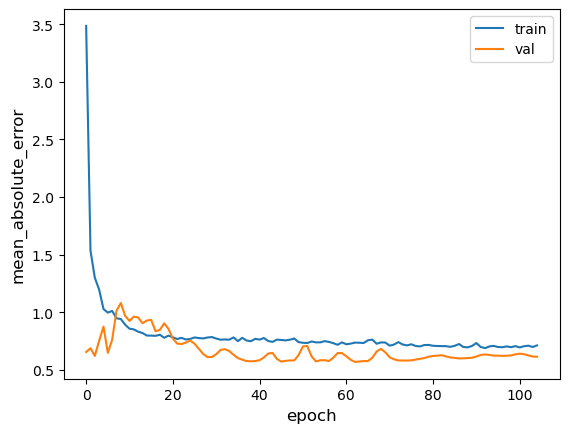

58/58 [==============================] - 1s 25ms/step - loss: 1.4082 - mean_absolute_error: 0.6348
Test accuracy 0.6347644925117493
Test loss 1.4081573486328125


In [147]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [148]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [149]:
rmse(y_test.values, y_test_pred)

0.2788557242037281

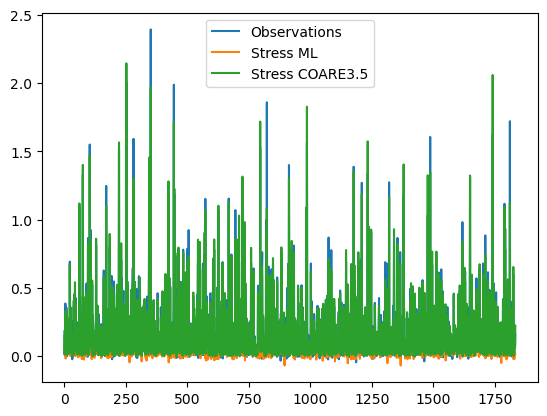

In [150]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

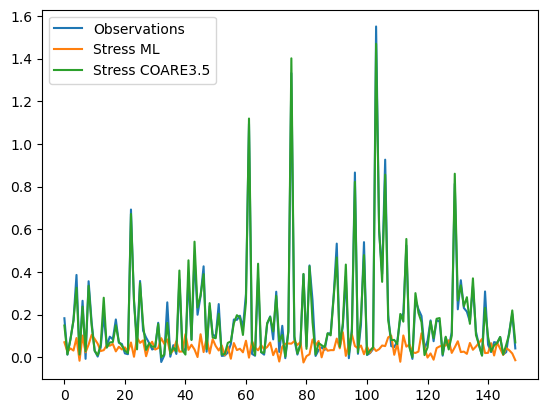

In [151]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [152]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[ 1.       , -0.0428606],
       [-0.0428606,  1.       ]])

In [153]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774866],
       [0.97774866, 1.        ]])

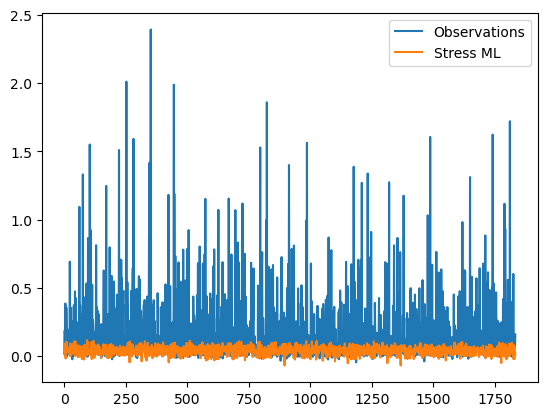

In [154]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [155]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97774866],
       [0.97774866, 1.        ]])

In [156]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.2788557242037281

Text(0, 0.5, 'Stress ML [N/m²]')

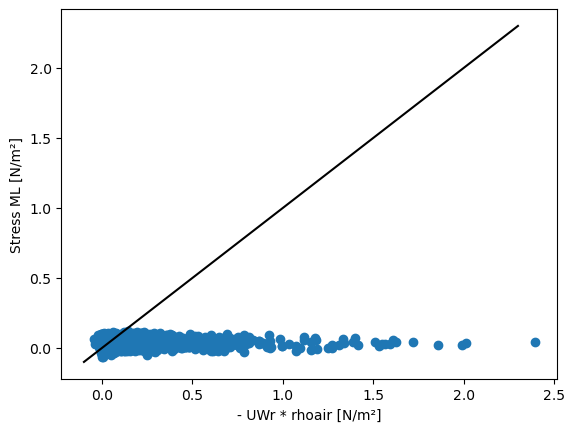

In [157]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 